Integrantes: Gabriel Pires de Farias

[Dataset](https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025?select=track_data_final.csv)

[Slides]()

[Video]()




### Importação dos dados em Python

In [169]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 3.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.7 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.7 MB 3.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 3.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 3.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 3.6 MB/s eta 0:00:00
   ----------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [419]:
import pandas as pd
filename = "track_data_final.csv"
df = pd.read_csv(filename)

### Análise exploratória dos dados (dimensões, tipos, primeiras linhas, estatísticas descritivas)

In [420]:
linhas, colunas = df.shape
print('='*10 + "DIMENSOES" + '='*10)
print("Linhas: " + str(linhas))
print("Colunas: " + str(colunas))

==========DIMENSOES==========
Linhas: 8778
Colunas: 15


In [383]:
datatypes = df.dtypes
print()
print('='*10 + "TIPOS" + '='*10)
print(datatypes)
print()
print("numericos = int64, float64")
print("categoricos = object")
print("booleanos = bool")


==========TIPOS==========
track_id               object
track_name             object
track_number            int64
track_popularity        int64
track_duration_ms       int64
explicit                 bool
artist_name            object
artist_popularity     float64
artist_followers      float64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
dtype: object

numericos = int64, float64
categoricos = object
booleanos = bool


In [ ]:
print()
print('='*10 + "PRIMEIRAS 4 LINHAS" + '='*10)
df.head(4)


==========PRIMEIRAS LINHAS==========


,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album


In [385]:
df.describe()

,track_number,track_popularity,track_duration_ms,artist_popularity,artist_followers,album_total_tracks
count,8778.000000,8778.000000,8778.000000,8774.000000,8.774000e+03,8778.000000
mean,5.749487,52.232855,210157.791866,69.954981,2.435487e+07,13.779790
std,6.017938,24.075221,63326.841454,19.532783,3.813769e+07,11.797943
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,1.000000,39.000000,173921.250000,60.000000,5.152768e+05,6.000000
50%,4.000000,58.000000,207276.000000,74.000000,6.272266e+06,13.000000
75%,9.000000,71.000000,239693.250000,84.000000,3.055055e+07,17.000000
max,102.000000,100.000000,811077.000000,100.000000,1.455421e+08,181.000000


### Entendimento e explicação dos dados, variáveis e contexto do problema

O dataset selecionado representa músicas classicas e populares no Spotify entre os anos de 2009 a 2023.

As variáveis(colunas) selecionadas representam:

* track_id: UUID para diferenciar cada faixa.
* track_name: nome da música.
* track_number: número da música no álbum (1 se for single).
* track_popularity: popularidade da faixa de 0 a 100.
* track_duration_ms: duração da faixa em milisegundos.
* explicit: se é uma faixa declarada como explícita no Spotify.
* artist_name: nome do artista que canta a música.
* artist_popularity: popularidade do artista de 0 a 100.
* artist_followers: quantidade de seguidores do artista no Spotify.
* artist_genres: gêneros de música do artista (declarado no perfil do artista).
* album_id: UUID do álbum.
* album_name: nome do album.
* album_release_date: data de lançamento do álbum.
* album_total_tracks: Número total de faixas do álbum.
* album_type: tipo do álbum (Compilation/Single/Álbum)

O problema a ser resolvido é procurar variáveis que mostrem correlação entre as músicas com 80% ou mais de popularidade e que se difere das músicas com menos de 80% de popularidade.

### Classificação das variáveis (numéricas, categóricas, discretas, contínuas)

- Categórica Nominal: track_name, artist_name, artist_genres, album_name, album_type, track_id, album_id.

- Categórica Booleana: explicit

- Numérica Contínua: track_duration_ms, album_total_tracks

- Numérica Discreta: track_number, track_popularity, artist_popularity, artist_followers, album_release_date

### Tratamento de dados inválidos ou inconsistentes

Existiam musicas que apareciam mais de uma vez na lista, será utilizado a combinação de track_name + artist_name para verificar as ocorrências e manter a que tiver maior track_popularity.

In [421]:
df = df.sort_values('track_popularity', ascending=False) # Ordenando por ordem descendente de track_popularity

df = df.drop_duplicates(
    subset=['track_name', 'artist_name'], # Removendo linhas com mesmo track_name + artist_name
    keep='first' # Mantendo a primeira ocorrencia (a que tem maior track_popularity)
)


In [422]:
df = df[df['track_duration_ms'] != 0] # Removendo linhas com track_duration_ms = 0

In [423]:
df = df.dropna() # Removendo linhas com valores NaN

a coluna 'artist_genres' estava sendo interpretada como string ao invés de list, será utilizado eval para corrigir.

In [424]:
import ast

df['artist_genres'] = df['artist_genres'].apply(ast.literal_eval)

In [425]:
df['artist_genres'] = df['artist_genres'].apply(
    lambda x: ['unknown'] if isinstance(x, list) and len(x) == 0 else x
) # Substituindo generos de artista vazios por 'unknown'

In [426]:
# Dados apos filtro
linhas, colunas = df.shape
print('='*10 + "DIMENSOES" + '='*10)
print("Linhas: " + str(linhas))
print("Colunas: " + str(colunas))

==========DIMENSOES==========
Linhas: 7923
Colunas: 15


### Seleção de atributos relevantes para o modelo

In [427]:
colunas_para_remover = ['album_id', 'track_id', 'album_release_date']
df = df.drop(columns=colunas_para_remover)

### Visualização dos dados com gráficos apropriados (histogramas, boxplots, dispersão, etc.)

In [428]:
import matplotlib.pyplot as plt

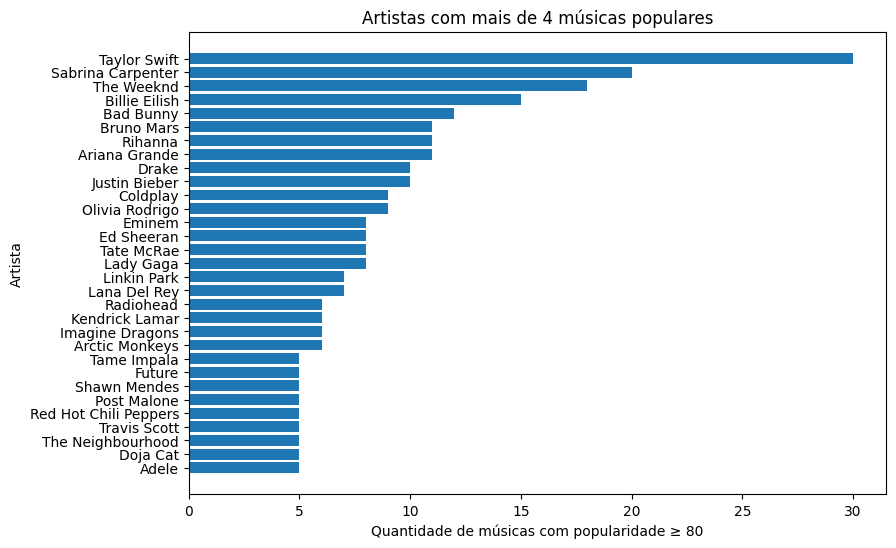

In [429]:
counts = df[df['track_popularity'] >= 80]['artist_name'].value_counts()
counts = counts[counts > 4]

plt.figure(figsize=(9, 6))
plt.barh(counts.index, counts.values)
plt.xlabel("Quantidade de músicas com popularidade ≥ 80")
plt.ylabel("Artista")
plt.title("Artistas com mais de 4 músicas populares")
plt.gca().invert_yaxis()  # Deixa os maiores no topo
plt.show()

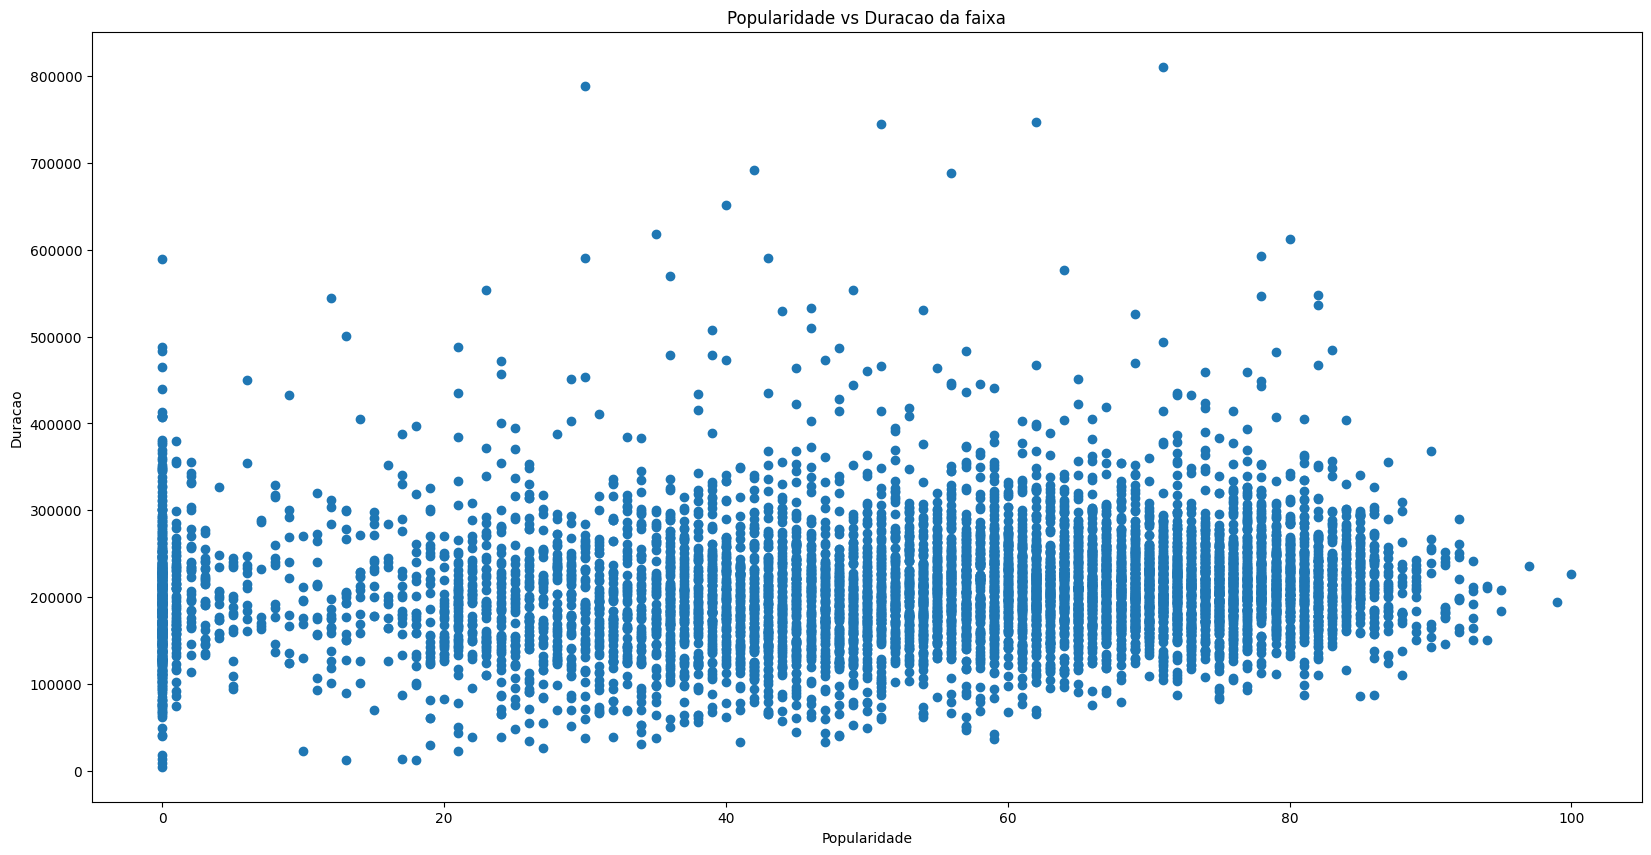

In [395]:
plt.figure(figsize=(20,10))
plt.scatter(df['track_popularity'], df['track_duration_ms'])
plt.xlabel("Popularidade")
plt.ylabel("Duracao")
plt.title("Popularidade vs Duracao da faixa")
plt.show()

In [452]:
musicas_oitenta_mais_popularidade = df["track_popularity"] >= 80
musicas_menos_oitenta_popularidade = df["track_popularity"] < 80
SETE_MINUTOS_EM_MS = 420000
musicas_sete_minutos_mais = df["track_duration_ms"] >= SETE_MINUTOS_EM_MS
a = df[musicas_oitenta_mais_popularidade]['track_name'].count()
b = df[(musicas_oitenta_mais_popularidade) & (musicas_sete_minutos_mais)]['track_name'].count()
c = df[musicas_menos_oitenta_popularidade]['track_name'].count()
d = df[(musicas_menos_oitenta_popularidade) & (musicas_sete_minutos_mais)]['track_name'].count()

print(b / a * 100) # Porcentagem de musicas com 7+ minutos em musicas com popularidade >=80
print(d / c * 100) # Porcentagem de musicas com 7+ minutos em musicas com popularidade <80

0.6915629322268326
0.986111111111111


In [ ]:
generos_populares_exploded = df[musicas_oitenta_mais_popularidade]["artist_genres"].explode() # Explodindo valores para pode contar
generos_populares_values = generos_populares_exploded.value_counts()
generos_populares_top10 = generos_populares_values.head(10)

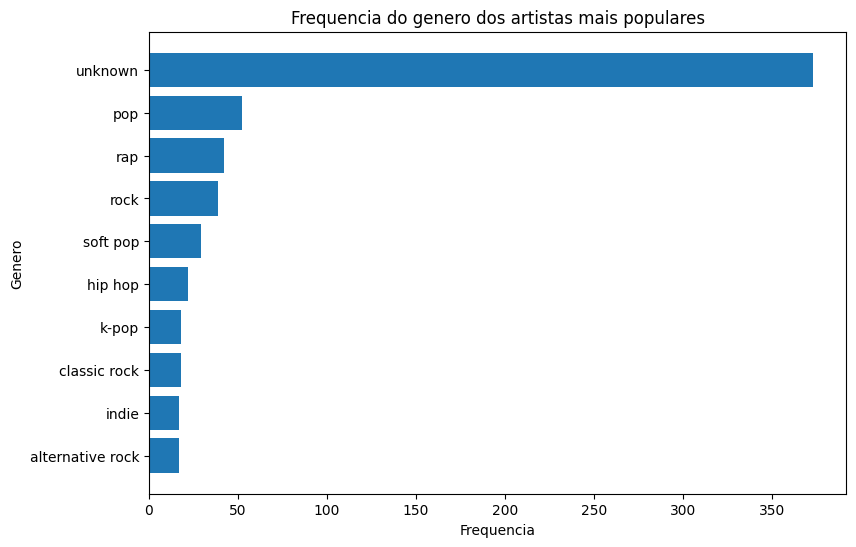

In [398]:
plt.figure(figsize=(9, 6))
plt.barh(
    generos_populares_top10.index,
    generos_populares_top10.values
)
plt.xlabel("Frequencia")
plt.ylabel("Genero")
plt.title("Frequencia do genero dos artistas mais populares")
plt.gca().invert_yaxis()
plt.show()

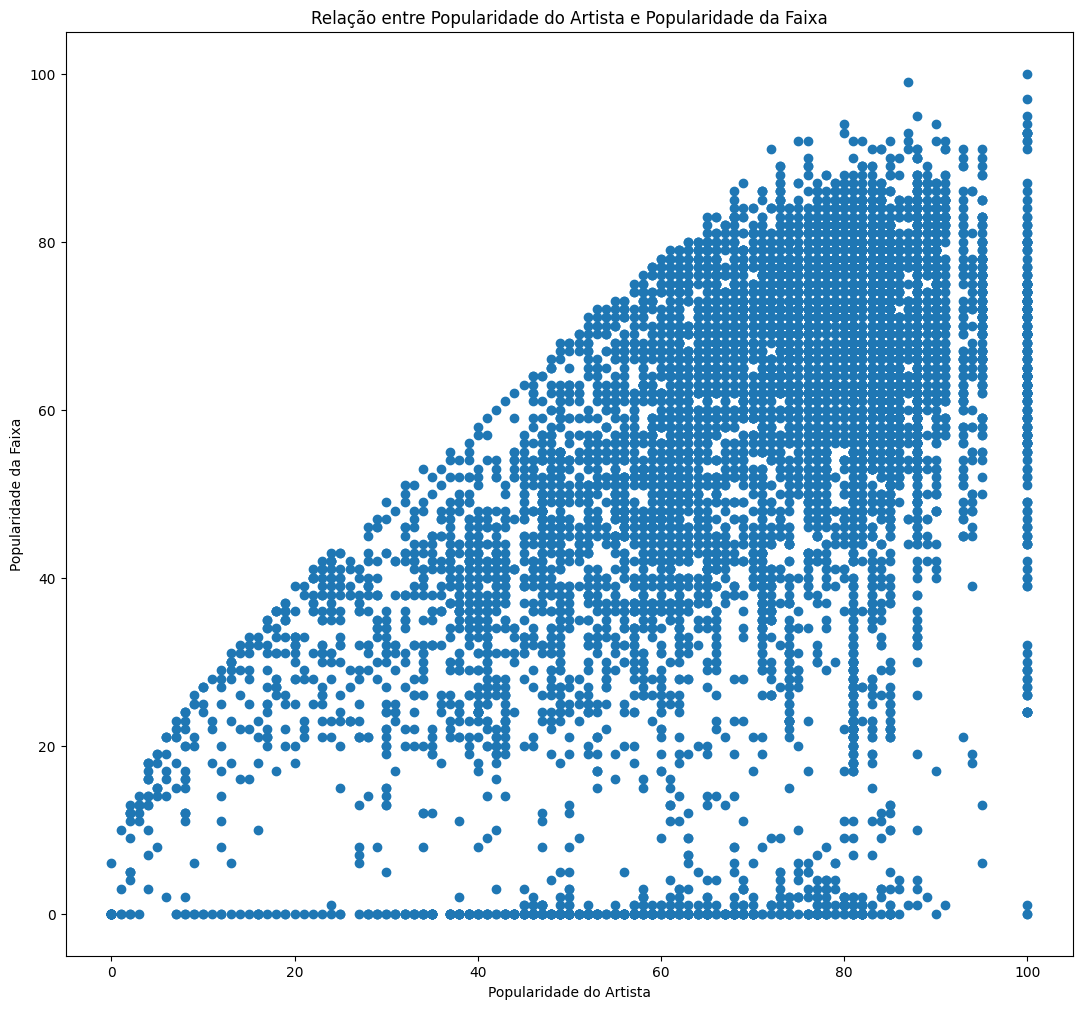

In [455]:
plt.figure(figsize=(13, 12))
plt.scatter(
    df["artist_popularity"],
    df["track_popularity"]
)

plt.title('Relação entre Popularidade do Artista e Popularidade da Faixa')
plt.xlabel('Popularidade do Artista')
plt.ylabel('Popularidade da Faixa')
plt.show()

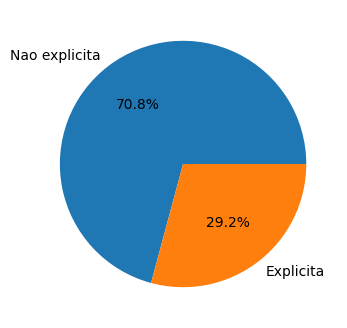

In [456]:
plt.figure(figsize=(6, 4))
plt.pie(
    df[musicas_oitenta_mais_popularidade]['explicit'].value_counts(),
    labels=["Nao explicita", "Explicita"],
    autopct="%1.1f%%"

)
plt.show()

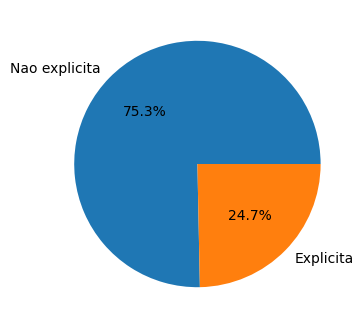

In [457]:
plt.figure(figsize=(6, 4))
plt.pie(
    df[musicas_menos_oitenta_popularidade]['explicit'].value_counts(),
    labels=["Nao explicita", "Explicita"],
    autopct="%1.1f%%"

)
plt.show()

### Separação entre atributos preditores (X) e variável-alvo ( y ).

Devido ao número de artistas com gênero 'unknown' ser muito maior, a variável será removida do modelo

In [441]:
y = df['track_popularity']

colunas_a_remover_de_X = [
    'track_popularity', # É a variável y
    'track_name',
    'artist_name',
    'album_name',
    'artist_genres'
]

X = df.drop(columns=colunas_a_remover_de_X)

In [460]:
# Discretização de 'track_popularity'
# Popularidade >= 80 = 1
# Popularidade < 80 = 0
POPULARIDADE_LIMITE = 80

df['y_target'] = (df['track_popularity'] >= POPULARIDADE_LIMITE).astype(int)
y = df['y_target']

### Transformações necessárias nas colunas (normalização, codificação, etc.)

In [403]:
from sklearn.preprocessing import MultiLabelBinarizer

# Instancia o binarizador
mlb = MultiLabelBinarizer()

# Ajusta o binarizador com a coluna de listas e transforma os dados em um array binário
genres_encoded = mlb.fit_transform(df['artist_genres'])

genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)

X = X.drop(columns=['artist_genres'])

X = pd.concat([X, genres_df], axis=1)

X

,track_number,track_duration_ms,explicit,artist_popularity,artist_followers,album_total_tracks,album_type,3 step,acid house,acid rock,...,vallenato,vaporwave,variété française,vietnamese hip hop,villancicos,vocal jazz,west coast hip hop,witch house,worship,yacht rock
7093,1,226073,False,100.0,145489371.0,12,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4373,4,194607,False,87.0,3551538.0,12,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5497,3,235355,False,100.0,145443567.0,12,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6451,2,208291,False,100.0,145489371.0,12,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3636,1,184000,False,88.0,1499215.0,3,single,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,9,321438,False,54.0,195974.0,10,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2029,4,199422,False,77.0,4777574.0,16,album,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5450,1,117413,True,82.0,15689879.0,1,single,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5819,1,187304,False,28.0,3745.0,1,single,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [443]:
# Divide a coluna album_type em album_type_album, album_type_compilation e album_type_single
X_encoded = pd.get_dummies(X, columns=['album_type'], drop_first=True)
X_encoded['album_type_compilation'] = X_encoded['album_type_compilation'].astype(int)
X_encoded['album_type_single'] = X_encoded['album_type_single'].astype(int)

In [444]:
X_encoded['explicit'] = X_encoded['explicit'].astype(int) # Converte True/False para 1/0

### Padronização dos dados para modelagem (ex: StandardScaler, MinMaxScaler)

In [445]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

colunas_para_escalonar = [
    'track_number',
    'track_duration_ms',
    'artist_popularity',
    'artist_followers',
    'album_total_tracks'
]

X_encoded[colunas_para_escalonar] = scaler.fit_transform(
    X_encoded[colunas_para_escalonar]
)

X_encoded[colunas_para_escalonar]

,track_number,track_duration_ms,artist_popularity,artist_followers,album_total_tracks
7093,-0.800874,0.263344,1.579334,3.386665,-0.150078
4373,-0.301216,-0.222322,0.923201,-0.512749,-0.150078
5497,-0.467769,0.406609,1.579334,3.385407,-0.150078
6451,-0.634321,-0.011114,1.579334,3.386665,-0.150078
3636,-0.800874,-0.386037,0.973673,-0.569132,-0.909114
...,...,...,...,...,...
1556,0.531548,1.735268,-0.742368,-0.604936,-0.318753
2029,-0.301216,-0.148004,0.418483,-0.479067,0.187271
5450,-0.800874,-1.413782,0.670842,-0.179276,-1.077788
5819,-0.800874,-0.335041,-2.054634,-0.610217,-1.077788


### Divisão dos dados em conjunto de treino e teste

In [446]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.25 # Amostra de 25%

# Define uma semente para garantir que a divisão seja a mesma a cada vez que rodar
RANDOM_STATE = 42

# Realiza a divisão
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)


### Treinamento de ao menos um modelo de machine learning supervisionado adequado ao problema

In [447]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=42, solver='liblinear')
modelo_logistico.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [449]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = modelo_logistico.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {acuracia * 100:.2f}%")
print(classification_report(y_test, y_pred))

Acurácia do Modelo: 90.01%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1781
           1       1.00      0.01      0.02       200

    accuracy                           0.90      1981
   macro avg       0.95      0.51      0.48      1981
weighted avg       0.91      0.90      0.85      1981

